In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ones = np.ones((3, 3))
zeros = np.zeros((7, 6))

In [ ]:
zeros

In [ ]:
ones

In [ ]:
x = np.zeros_like(zeros)
x[3:6, 2:5] += 1
x[3:5, 2:5] += 2
x

In [ ]:
heatmask = x[np.where(x > 0)]

In [ ]:
x[heatmask] += 100

In [ ]:
x

In [ ]:
wheres = np.where(x > 0)

In [ ]:
x[wheres] = 5

In [ ]:
y = np.logical_not(x)

In [ ]:
y

In [ ]:
x[y] = 100

In [ ]:
x

## Start

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
heat = np.zeros((720, 1280), dtype = np.uint8)
c = 60
d = 120
extra = 400

In [6]:
x1 = 984
x2 = 1080
y1 = 400
y2 = 496
print('x2-x1: ', x2-x1)
print('y2 - y1: ', y2  - y1)

x2-x1:  96
y2 - y1:  96


In [7]:
detections = [(x1, y1, x2, y2), (x1+c, y1+c, x2+c, y2+c), (x1+d, y1+d, x2+d, y2+d)]

In [8]:
for (x1, y1, x2, y2) in detections:
    heat[y1:y2, x1:x2] += 1

In [9]:
# Add extra
heat[y1-extra:y2-extra,x1-extra:x2-extra] += 1

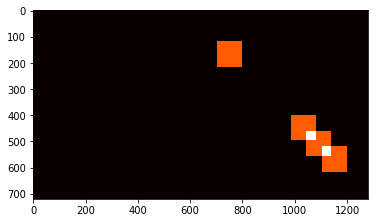

In [10]:
plt.imshow(heat, cmap='hot')

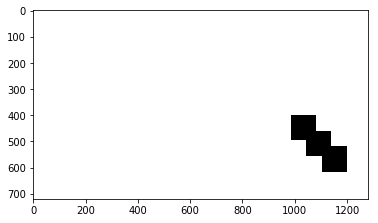

In [11]:
cool_map = np.ones_like((heat), dtype = np.uint8)
for (x1, y1, x2, y2) in detections:
    cool_map[y1:y2, x1:x2] = 0
plt.imshow(cool_map, cmap='gray')

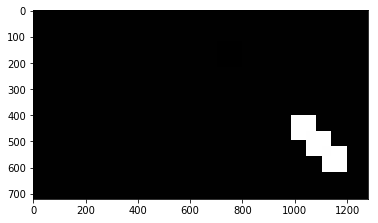

In [12]:
hitta = np.subtract(cool_map, heat)
plt.imshow(hitta, cmap='gray')

In [13]:
cool_map = np.ones_like((heat), dtype = np.uint8)
cool_maps = []
for (x1, y1, x2, y2) in detections:
    cool_map[y1:y2, x1:x2] = 0
    cool_maps.append(cool_map)

In [17]:
real_map = np.ones_like((heat), dtype = np.uint8)
for cool_map in cool_maps:
    real_map[np.logical_and(real_map, cool_map)] = 0

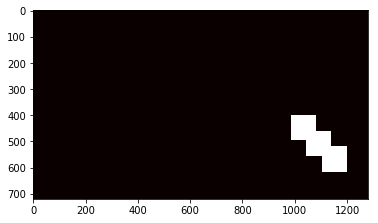

In [19]:
plt.imshow(real_map, cmap='hot')

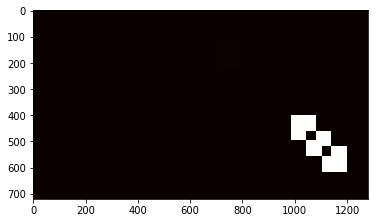

In [23]:
heat = np.subtract(heat, real_map)
# heat = heat.clip(min = 0)
plt.imshow(heat, cmap='hot')

In [ ]:
cool_map = np.zeros_like((heat), dtype = np.uint8)
temp_mask = np.zeros_like((heat), dtype = np.uint8)

for (x1, y1, x2, y2) in detections:
    cool_map[y1:y2, x1:x2] += 1
    
cool_mask = np.logical_not(cool_map > 0)
# plt.imshow(cool_mask, cmap='gray')

temp_mask[cool_mask] = 1
# plt.imshow(new_mask, cmap='gray')
plt.imshow(temp_mask, cmap='gray')

In [ ]:
newmap = (temp_mask - heat)

In [ ]:
plt.imshow(newmap, cmap='gray')

## MONEY

In [ ]:
heat_copy = np.copy(heat)

In [ ]:
plt.imshow(heat_copy, cmap='gray')
plt.title('before cooling')

In [ ]:
plt.imshow(heat_copy - temp_mask)

In [ ]:
# heat_copy[cool_mask] -= 1
heat_copy[cool_mask] = heat_copy[cool_mask] - 1
plt.imshow(heat_copy, cmap='gray')
plt.title('after cooling')

In [ ]:
heat_copy[cool_mask == 1] -= 1
plt.imshow(heat_copy, cmap='gray')
plt.title('after cooling')

In [ ]:
heat = (heat - temp_mask)
plt.imshow(heat, cmap='gray')

In [ ]:
plt.imshow(heat, cmap='gray')

In [ ]:
cool = np.ones_like((heat), dtype = np.uint8)


In [ ]:
heat[np.where(cool == 1)] -= 1
plt.imshow(heat, cmap='gray')

In [ ]:
plt.imshow(heat, cmap='gray')

In [ ]:
cool_maps = []

In [ ]:
heat[y1:y2, x1:x2] += 1

In [ ]:
cool_map = np.ones_like((heat), dtype=np.uint8)

In [ ]:
plt.imshow(heat, cmap='gray')

In [ ]:
cool_map = np.ones_like((heat), dtype=np.uint8)
cool_map[y1:y2, x1:x2] = 0
cool_maps.append(cool_map)
plt.imshow(cool_map, cmap='gray')

In [ ]:
newheat = np.subtract(heat, cool_map)
plt.imshow(newheat)


In [ ]:
cool_map[y1+30:y2+30,x1+30: x2+30] = 0
cool_maps.append(cool_map)
plt.imshow(cool_map, cmap='gray')

In [ ]:
plt.imshow((heat - cool_map), cmap='gray')

In [ ]:
cool_mask = np.ones_like((heat), dtype=np.uint8)


In [ ]:
mask = np.array([np.logical_or(x)])

In [ ]:
mask = np.logical_or(cool_maps[0], cool_maps[1])
mask.shape
plt.imshow(mask, cmap='gray')


    

In [ ]:
nonzero = heat.nonzero()
nonzerox = nonzero[1]
nonzeroy = nonzero[0]
print('nonzerox: ', nonzerox)
cool_inds = ((nonzerox < x1) | (nonzerox > x2) | (nonzeroy < y1) | (nonzeroy > y2))

print('cool_inds: ', cool_inds.shape)
print('cool_inds: ', cool_inds)
# for i in cool_inds:
#     if i == True:
#         print(i)
#     elif i == False:
#         print('y')


In [ ]:
# cool_region = np.logical_not(heat[y1:y2, x1:x2])

In [ ]:
cool_mask = np.ones((heat.shape), dtype = np.uint8)
plt.imshow(cool_mask, cmap='gray')

In [ ]:
cool_mask[cool_inds] = 2
plt.imshow(cool_mask, cmap='gray')

In [ ]:
heatmask = np.ones_like(heat)
plt.imshow(heatmask, cmap = 'gray')

In [ ]:
heatmask[heatmask[cool_region] >= 1] = 100
plt.imshow(heatmask, cmap='gray')

In [ ]:
# heat[np.where(cool_region < 1)] -= 1

In [ ]:
heat[heat[cool_region]] -= 1
print('cool_region: ', cool_region.shape)
plt.imshow(heat, cmap='gray')

In [ ]:
cool_inds = ((nonzerox < x1) & (nonzerox > x2) & (nonzeroy < y1) & (nonzeroy > y2))
x = nonzerox[cool_inds]
y = nonzeroy[cool_inds]
cool_inds = np.logical_and(np.where(nonzerox < x1), np.where(nonzerox > x2))
print(cool_inds)

In [ ]:
heat[0:x, 0:y] = 0
plt.imshow(heat)